<a href="https://colab.research.google.com/github/saraswathivelmurugan43/saraswathivelmurugan43/blob/main/phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving phishing-dataset-variation.xlsx to phishing-dataset-variation (1).xlsx
   qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            3               0                  0              1   
1            5               0                  1              3   
2            2               0                  0              1   
3            4               0                  2              5   
4            2               0                  0              0   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              3           0            2   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  ...  qty_ip_resolved  qty_nameservers  \
0                    0        

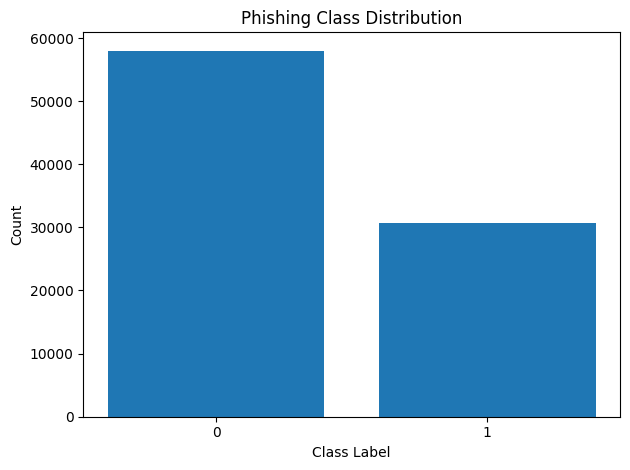


Accuracy: 0.8170896785109983

Confusion Matrix:
 [[0 0]
 [0 0]]


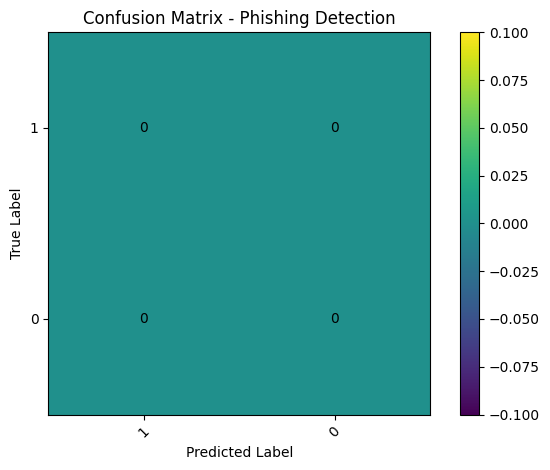

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


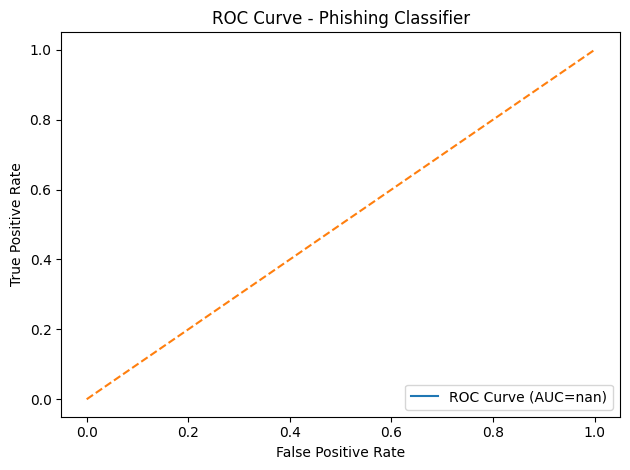

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload the phishing dataset (Excel)
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Read xlsx file
df = pd.read_excel(file_name)

# Display dataset preview
print(df.head())
print("Columns:", df.columns)

# ---- 🔹 CHANGE THIS TO YOUR LABEL COLUMN NAME ----
LABEL_COL = 'phishing'

# Plot class distribution
label_counts = df[LABEL_COL].value_counts()
plt.figure()
plt.bar(label_counts.index.astype(str), label_counts.values)
plt.title("Phishing Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Split features and labels
X = df.drop(LABEL_COL, axis=1)
y = df[LABEL_COL]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert each row into a single text string for TF-IDF
X_train_text = X_train.astype(str).agg(' '.join, axis=1)
X_test_text = X_test.astype(str).agg(' '.join, axis=1)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predictions
predictions = model.predict(X_test_vec)
acc = accuracy_score(y_test, predictions)
print("\nAccuracy:", acc)

# Confusion Matrix
# Ensure unique_labels are integers for confusion_matrix, convert to string for plot display
unique_labels_int = y.unique()
cm = confusion_matrix(y_test, predictions, labels=unique_labels_int)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix - Phishing Detection")
plt.colorbar()
tick_marks = np.arange(len(unique_labels_int))
plt.xticks(tick_marks, unique_labels_int.astype(str), rotation=45)
plt.yticks(tick_marks, unique_labels_int.astype(str))

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j],
                 ha="center", va="center",
                 color="white" if cm[i,j] > cm.max()/2 else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ROC Curve (only if 2 classes)
if len(unique_labels_int) == 2:
    # Assuming '1' is the positive class. Adjust if '0' is positive.
    positive_class_label = 1
    y_test_binary = (y_test == positive_class_label).astype(int)
    # predict_proba[:, 1] assumes that class 1 is the positive class
    y_prob = model.predict_proba(X_test_vec)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.3f})")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Phishing Classifier")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
else:
    print("ROC curve skipped (multi-class dataset).")